# Stock Market Prediction Univariate Recurrent Neural Networks

## Veri Çekme

In [1]:
!pip install yfinance

In [10]:
import math 
import numpy as np 
import pandas as pd 
from datetime import date, timedelta
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
import seaborn as sns

In [58]:
stockname = "Amazon"
symbol = "AMZN"
start_date = "2020-11-01"
end_date = str(date.today())
today = date.today()

In [59]:
import yfinance as yf 
df = yf.download(start=start_date,end =end_date,tickers =symbol, interval = "1h")

[*********************100%***********************]  1 of 1 completed


In [30]:
df_year = yf.download(start="2000-01-01",end =end_date,tickers =symbol, interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [60]:
print(df.shape)
df.head(5)

(3435, 6)


,Open,High,Low,Close,Adj Close,Volume
2020-11-02 09:30:00-05:00,153.087006,153.985260,150.330719,150.365005,150.365005,2048581
2020-11-02 10:30:00-05:00,150.364502,150.659500,149.336761,149.368988,149.368988,1237275
2020-11-02 11:30:00-05:00,149.402496,150.550003,149.005508,149.516144,149.516144,797408
2020-11-02 12:30:00-05:00,149.478500,149.532990,148.025497,148.673004,148.673004,712459
2020-11-02 13:30:00-05:00,148.626495,148.750000,147.506012,148.572495,148.572495,708285


In [61]:
print(df_year.shape)
df_year.head(5)

(5734, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
2000-01-04 00:00:00-05:00,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2000-01-05 00:00:00-05:00,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
2000-01-06 00:00:00-05:00,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
2000-01-07 00:00:00-05:00,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


## Veri Görselleştirme

In [62]:
?mdates

Type:        module
String form: <module 'matplotlib.dates' from 'C:\\Users\\Mustafa\\anaconda3\\lib\\site-packages\\matplotlib\\dates.py'>
File:        c:\users\mustafa\anaconda3\lib\site-packages\matplotlib\dates.py
Docstring:  
Matplotlib provides sophisticated date plotting capabilities, standing on the
shoulders of python :mod:`datetime` and the add-on module :mod:`dateutil`.

By default, Matplotlib uses the units machinery described in
`~matplotlib.units` to convert `datetime.datetime`, and `numpy.datetime64`
objects when plotted on an x- or y-axis. The user does not
need to do anything for dates to be formatted, but dates often have strict
formatting needs, so this module provides many axis locators and formatters.
A basic example using `numpy.datetime64` is::

    import numpy as np

    times = np.arange(np.datetime64('2001-01-02'),
                      np.datetime64('2002-02-03'), np.timedelta64(75, 'm'))
    y = np.random.randn(len(times))

    fig, ax = plt.subplots()
    

In [68]:
?ax1.xaxis

Type:            XAxis
String form:     XAxis(180.0,54.0)
File:            c:\users\mustafa\anaconda3\lib\site-packages\matplotlib\axis.py
Docstring:       <no docstring>
Class docstring:
Base class for `.XAxis` and `.YAxis`.

Attributes
----------
isDefault_label : bool

axes : `matplotlib.axes.Axes`
    The `~.axes.Axes` to which the Axis belongs.
major : `matplotlib.axis.Ticker`
    Determines the major tick positions and their label format.
minor : `matplotlib.axis.Ticker`
    Determines the minor tick positions and their label format.
callbacks : `matplotlib.cbook.CallbackRegistry`

label : `.Text`
    The axis label.
labelpad : float
    The distance between the axis label and the tick labels.
    Defaults to :rc:`axes.labelpad` = 4.
offsetText : `.Text`
    A `.Text` object containing the data offset of the ticks (if any).
pickradius : float
    The acceptance radius for containment tests. See also `.Axis.contains`.
majorTicks : list of `.Tick`
    The major ticks.
minorTicks : 

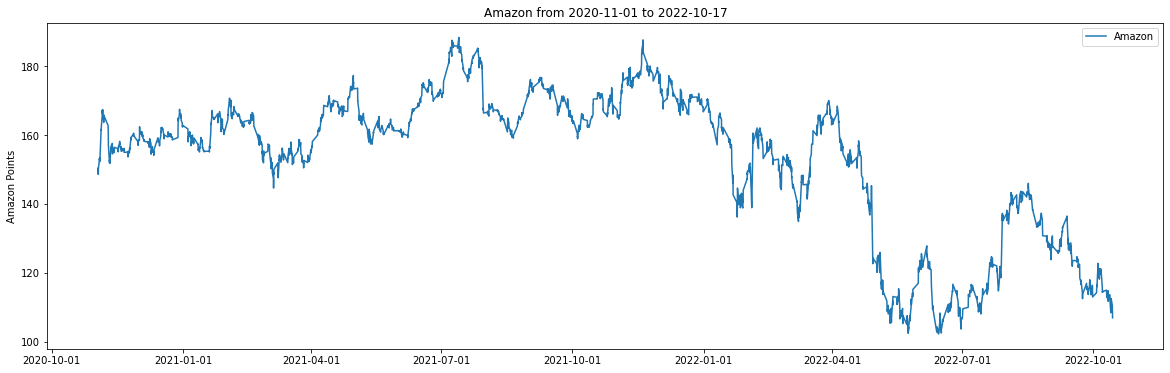

In [75]:
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax1.legend([stockname], fontsize=15)
plt.title(stockname + ' from '+ start_date + ' to ' + end_date)
sns.lineplot(data=df['Close'], label=stockname, linewidth=1.5)
plt.ylabel('Amazon Points')
plt.show()

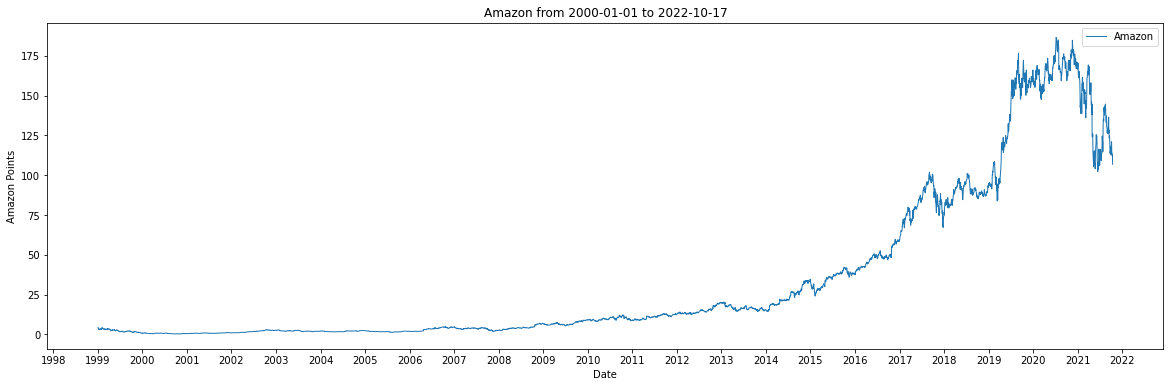

In [38]:
years = mdates.YearLocator() 
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.xaxis.set_major_locator(years)
ax1.legend([stockname], fontsize=12)
plt.title(stockname + ' from '+ '2000-01-01' + ' to ' + end_date)
sns.lineplot(data=df_year['Close'], label=stockname, linewidth=1.0)
plt.ylabel('Amazon Points')
plt.show()

## Veri Normalizasyonu(Ölçeklendirme)

In [77]:
train_df = df.filter(['Close'])
data_unscaled = train_df.values

In [78]:
train_data_length = math.ceil(len(data_unscaled) * 0.8)

In [79]:
train_data_length

2748

In [80]:
mmscaler = MinMaxScaler(feature_range=(0, 1))
np_data = mmscaler.fit_transform(data_unscaled)

In [81]:
np_data

array([[0.55910364],
       [0.54753193],
       [0.54924159],
       ...,
       [0.06552078],
       [0.06028572],
       [0.05447673]])

## Girdiyi Düzenleme

Eğitime başlamadan veri setimizi train ve test olarak ayırmamız gerekiyor.Bu sayede test kısmı ile veriyi test edeceğiz.
Daha sonra ise son 1 haftanın 1'er saatlik verisine göre (yani ortalama 50 veri) bir sonraki saati tahmin etmeye çalışacağız.

In [82]:
index_Close = train_df.columns.get_loc("Close")
print(index_Close)

0


In [83]:
train_data_len = math.ceil(np_data.shape[0] * 0.8)

In [84]:
train_data_len

2748

In [85]:
sequence_length = 50
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]

In [86]:
train_data[:10],test_data[:10]

(array([[0.55910364],
        [0.54753193],
        [0.54924159],
        [0.53944601],
        [0.53827829],
        [0.55027972],
        [0.55746543],
        [0.59029788],
        [0.58631856],
        [0.59464523]]),
 array([[0.10418721],
        [0.10001918],
        [0.11497731],
        [0.11723413],
        [0.12051276],
        [0.12873297],
        [0.11875321],
        [0.14763266],
        [0.15264869],
        [0.09639441]]))

In [87]:
train_df.shape[0]

3435

In [88]:
def partition_dataset(sequence_length, train_df):
    x, y = [], []
    data_len = train_df.shape[0]
    for i in range(sequence_length, data_len):
        x.append(train_df[i-sequence_length:i,:]) 
        y.append(train_df[i, index_Close])

    x = np.array(x)
    y = np.array(y)
    return x, y

In [90]:
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

In [27]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2469, 50, 1) (2469,)
(629, 50, 1) (629,)


In [28]:
print(x_test[1][sequence_length-1][index_Close])
print(y_test[0])

0.23043096037822242
0.23043096037822242


In [105]:
x_train[:2]

array([[[0.55910364],
        [0.54753193],
        [0.54924159],
        [0.53944601],
        [0.53827829],
        [0.55027972],
        [0.55746543],
        [0.59029788],
        [0.58631856],
        [0.59464523],
        [0.5897111 ],
        [0.58391966],
        [0.58815444],
        [0.58172959],
        [0.67739247],
        [0.68723343],
        [0.6867328 ],
        [0.68440339],
        [0.68970697],
        [0.68706981],
        [0.69495257],
        [0.74208094],
        [0.75526728],
        [0.74269679],
        [0.75048649],
        [0.7542217 ],
        [0.75675445],
        [0.74191252],
        [0.71372542],
        [0.71819438],
        [0.72796514],
        [0.73853151],
        [0.73182214],
        [0.72863524],
        [0.73517975],
        [0.70329431],
        [0.70173179],
        [0.68110393],
        [0.68571045],
        [0.67737457],
        [0.66583158],
        [0.63696728],
        [0.57809897],
        [0.58025412],
        [0.58632441],
        [0

## Model